In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
path = '/home/andres/Escritorio/OrgaDeDatos'
df= pd.read_csv(path + '/train.csv')

#Fuente: https://es.investing.com/currencies/usd-mxn-historical-data
path1 = '/home/andres/Escritorio/OrgaDeDatos'
dolar= pd.read_csv(path1 + '/Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)


dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)


dolar.columns= ['price', "date"]

dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)


df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month


newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
newDf.head(1000)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,year,month,price,dollar_price
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2273000.0,2015,8,16.7522,135683.671398
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0.0,0.0,0.0,1.0,1.0,3600000.0,2013,6,12.9460,278078.170864
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1200000.0,2015,10,16.5000,72727.272727
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,650000.0,2012,3,12.8070,50753.494183
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,6,18.2800,62910.284464
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1100000.0,2014,3,13.0578,84240.836894
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,2,18.1350,63413.289220
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4200000.0,2016,10,18.8640,222646.310433
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,310000.0,2014,1,13.3562,23210.194516
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,6200000.0,2016,12,20.7275,299119.527198


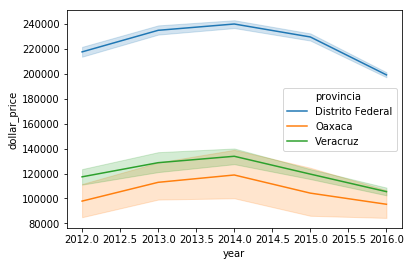

In [4]:
filtro = newDf['provincia'].isin(['Distrito Federal','Veracruz','Oaxaca'])
df=newDf[filtro]
sns.lineplot(x="year",y='dollar_price',data=df,hue='provincia',sizes=100)

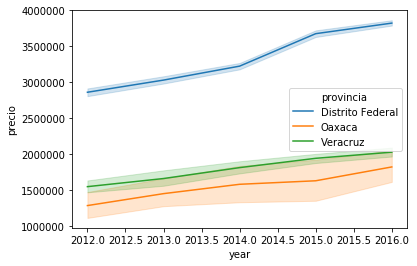

In [5]:
filtro = newDf['provincia'].isin(['Distrito Federal','Veracruz','Oaxaca'])
df=newDf[filtro]
sns.lineplot(x="year",y='precio',data=df,hue='provincia')

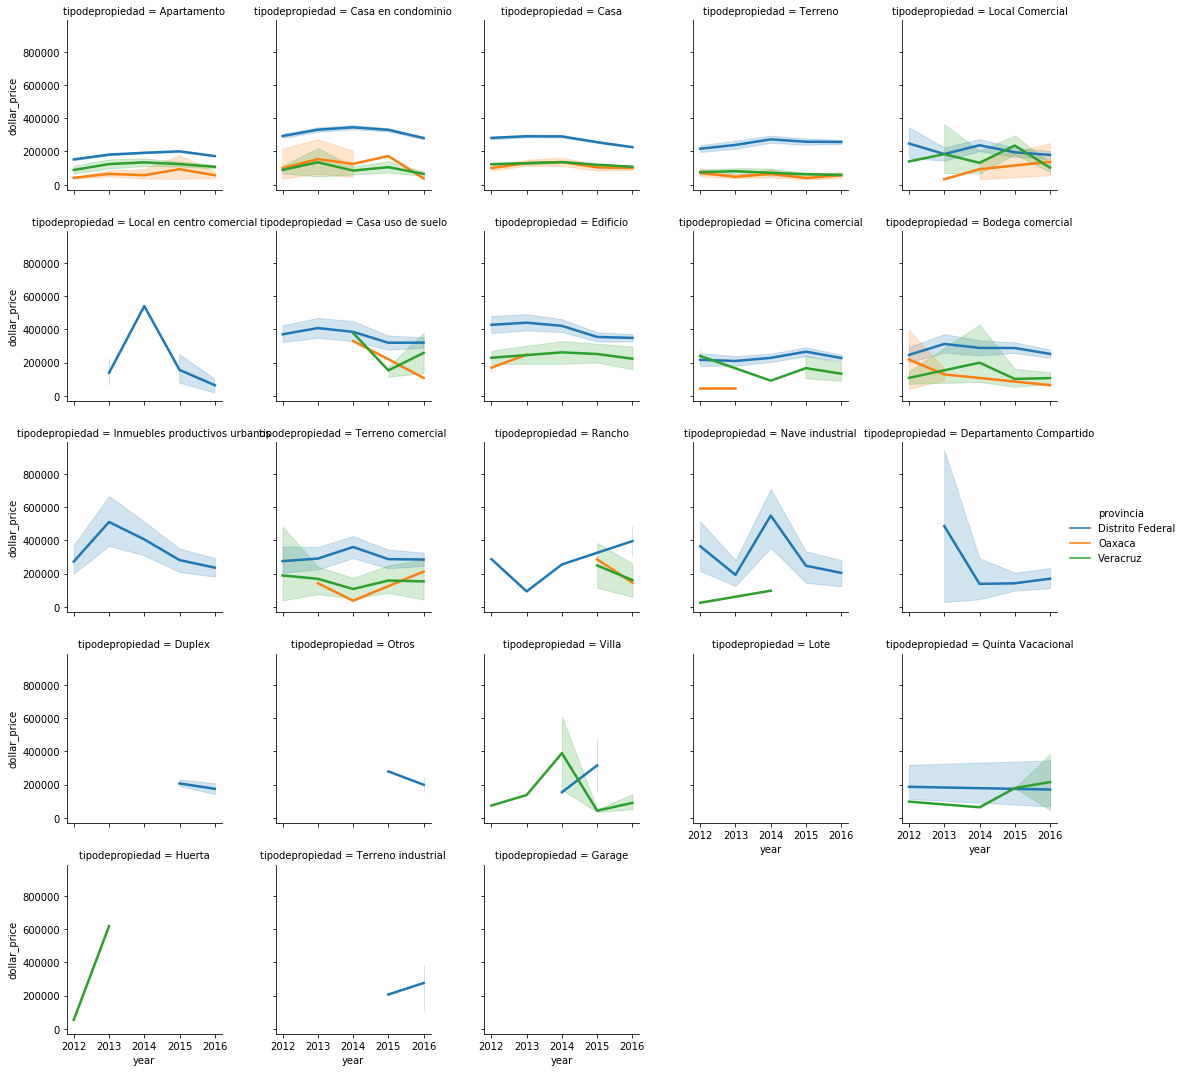

In [10]:
filtroPorProvincias = newDf['provincia'].isin(['Distrito Federal','Veracruz','Oaxaca'])
#filtroPorPropiedad = newDf['tipodepropiedad'].isin(['Casa','Terreno','Edificio','Oficina comercial'])
df=newDf[filtroPorProvincias]
sns.relplot(x="year", col_wrap=5,y='dollar_price',kind='line',data=df,hue='provincia',col='tipodepropiedad',height=3, linewidth=2.5)

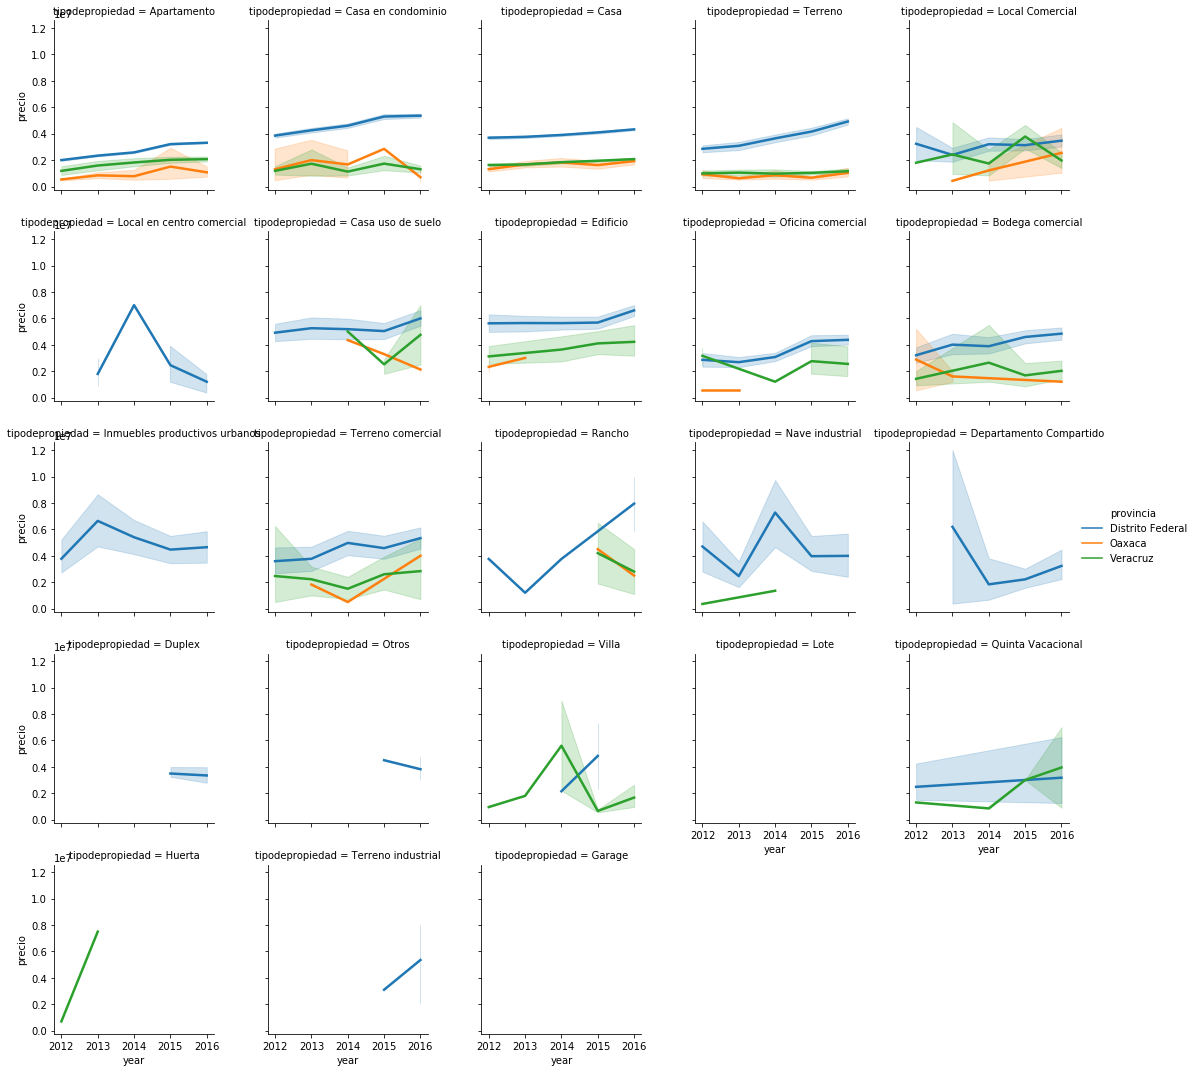

In [11]:
filtroPorProvincias = newDf['provincia'].isin(['Distrito Federal','Veracruz','Oaxaca'])
#filtroPorPropiedad = newDf['tipodepropiedad'].isin(['Casa','Terreno','Edificio','Oficina comercial'])
df=newDf[filtroPorProvincias]
sns.relplot(x="year", col_wrap=5,y='precio',kind='line',data=df,hue='provincia',col='tipodepropiedad',height=3, linewidth=2.5)

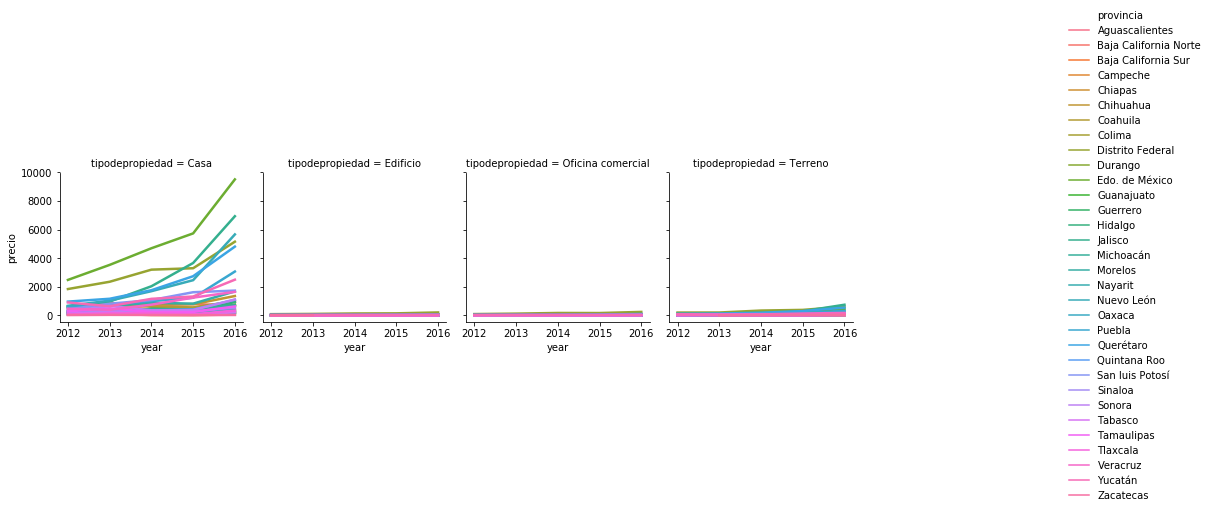

In [53]:
filtroPorProvincias = newDf['provincia'].isin(['Distrito Federal','Veracruz','Oaxaca'])
filtroPorPropiedad = newDf['tipodepropiedad'].isin(['Casa','Terreno','Edificio','Oficina comercial'])
dfConConteoDeVentas = df.groupby(['year','tipodepropiedad','provincia']).agg({'precio':'count'})
dfConConteoDeVentas.reset_index(inplace=True)

sns.relplot(x='year', col_wrap=5,y='precio',kind='line',hue='provincia',data=dfConConteoDeVentas,col='tipodepropiedad',height=3, linewidth=2.5)

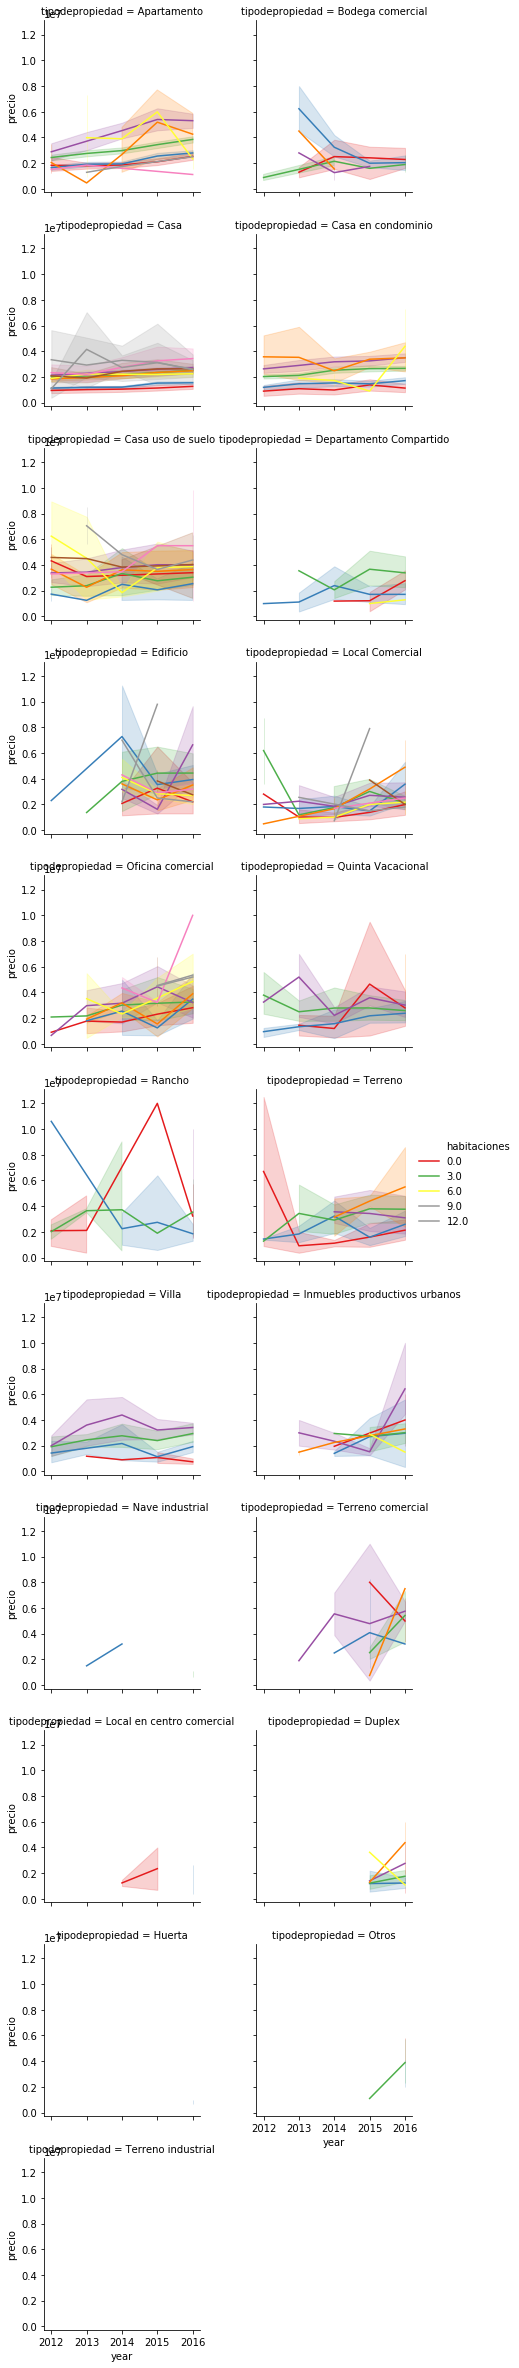